In [43]:
#converting timeseries data to dataframe
import pandas as pd
import numpy as np
df=pd.read_excel("E:\DS_Business\Book1.xlsx",header=0)

In [44]:
#split sequence into mini sequence with length of 12 points
l=df.Series.to_list()
data=[l[i:i+12] for i in range(0,2582)]
df1=pd.DataFrame(data[0:2581])

In [46]:
#verifying
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,9.38,9.42,9.44,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46
1,9.42,9.44,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46
2,9.44,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46,11.44
3,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46,11.44,11.46
4,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46,11.44,11.46,11.46


In [55]:
#reference signal pattern (or pattern to be counted)
ref_signal=pd.DataFrame([[11.34,11.36,9.38,9.4,11.44,11.46,11.46,10.04,11.46,11.46,11.46,11]])

In [56]:
ref_signal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,11.34,11.36,9.38,9.4,11.44,11.46,11.46,10.04,11.46,11.46,11.46,11


In [91]:
#Calculate_Distance_or_RMSE_From_reference_signal
#(x2-xref)**2
df_distance=df1.rsub([11.34,11.36,9.38,9.4,11.44,11.46,11.46,10.04,11.46,11.46,11.46,11]).pow(2)
#distance=sqrt((x2-xref)**2+(y2-yref)**2......)
df_distance=df_distance.sum(axis=1).pow(0.5)

In [93]:
#appending distance to orginal df1
df1['Distance']=df_distance
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Distance
0,9.38,9.42,9.44,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,4.568982
1,9.42,9.44,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46,4.069545
2,9.44,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46,11.44,3.543558
3,9.40,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46,11.44,11.46,3.130176
4,9.44,9.44,9.74,11.46,11.46,11.46,11.46,11.46,11.46,11.44,11.46,11.46,3.728056


In [104]:
#Identifying Signal patterns similar to Ref.Signal
matching_patterns=df1[df1['Distance']<1]
matching_patterns.shape

(15, 13)

In [107]:
#no.of repititions of pattern
answer=matching_patterns.shape[0]
print('The pattern is repeated ',answer,' times')

The pattern is repeated  15  times


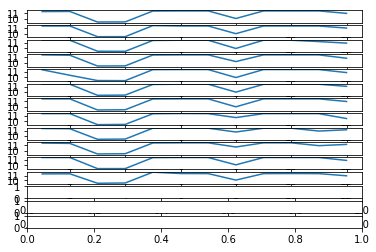

In [118]:
# plotting the signal patterns for viewing
import matplotlib.pyplot as plt
x=list(range(1,13))
fig,axs=plt.subplots(15)
for i in range(0,12):
    axs[i].plot(x,matching_patterns.iloc[i,:12])

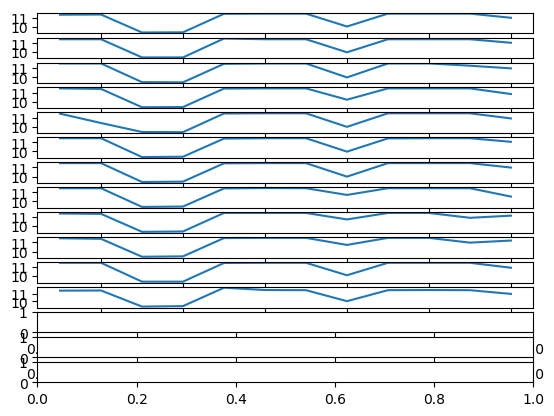

In [116]:
fig()